In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

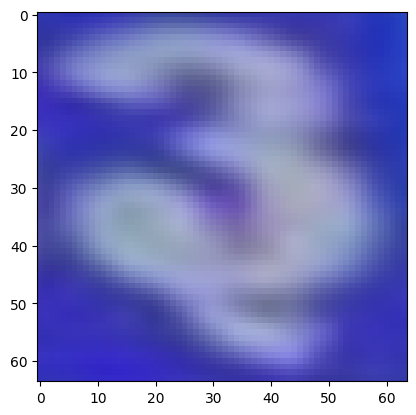

In [2]:
image = cv2.imread('./ch/character_6.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

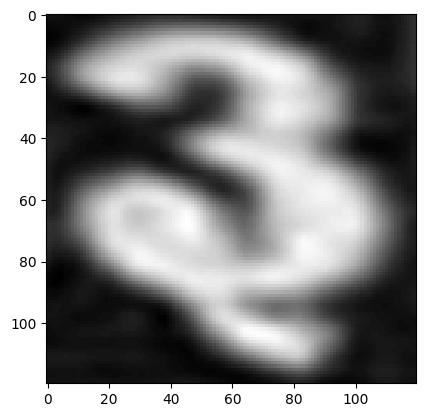

In [3]:
gray_image = cv2.resize(gray_image, (120,120))
plt.imshow(gray_image, cmap='gray')

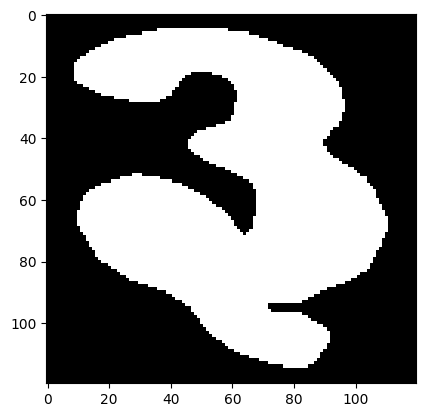

In [4]:
ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

(120, 120)

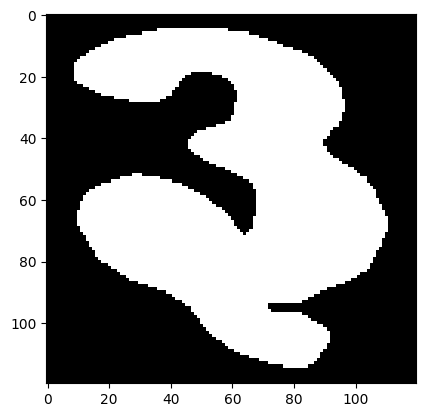

In [5]:
# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Filter out small blobs
min_blob_area = 400  # Minimum area threshold for blobs
filtered_labels = labels.copy()
for label in range(1, num_labels):
    area = stats[label, cv2.CC_STAT_AREA]
    if area < min_blob_area:
        filtered_labels[labels == label] = 0

# Create the filtered image
filtered_image = np.where(filtered_labels > 0, 255, 0).astype(np.uint8)

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')

filtered_image.shape



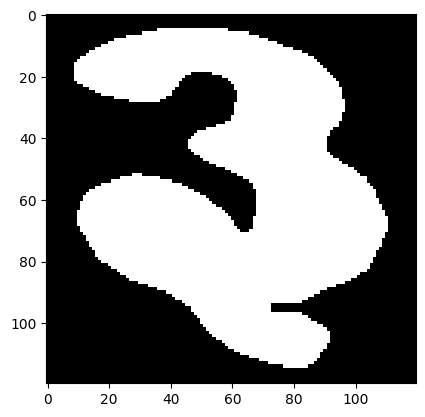

In [6]:
# Define the kernel size
kernel = np.ones((3,3),np.uint8)

# Perform morphological opening
closing = cv2.morphologyEx(filtered_image, cv2.MORPH_CLOSE, kernel)

cv2.imwrite('closing.png', closing)

plt.imshow(closing, cmap='gray')